# CIBC

## Advanced Analytics Case Competition 

### Submission By Team-1 

1. Bhavana Rao
2. Haritha Poornachandran
3. Vaibhav Batra
4. Yash Bhatnagar

____

# Part 1 - Customer Data Analysis

### Importing necessary libraries

In [1]:
#!pip install dython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from dython import nominal

### Data cleaning

In [2]:
#Reading the file
df = pd.read_csv("Good/Data/Bank_Customers.csv")

#Removing unecessary columns
df.drop(['Revenue', 'Margin','LifeInsurance','BusinessOwner','NumTransactions','NumProducts','Age'
         ,'Dependents','EstimatedSalary','HasCrCard','CreditScore','ForeignAssets'],
        axis=1,inplace=True)

#dropping NULL values if any
df.dropna(inplace=True) #In this case just 1 -- probably an entry error

df

,CustomerID,Gender,Married,NumBankAccts,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,LastTransactionAmt
0,15634602.0,Female,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0,1.0,0.16,0.0,75615.0,0.1232,0.3623,2095.3
1,15647311.0,Female,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.48,33658.0,21131.0,0.1262,0.4050,9955.2
2,15619304.0,Female,1.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1.0,0.13,0.0,86608.0,0.0997,0.4239,9123.1
3,15701354.0,Female,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.21,1431.0,54767.0,0.0932,0.1576,5973.3
4,15737888.0,Female,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.03,40265.0,28374.0,0.1289,0.1568,9834.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229.0,Male,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.46,21524.0,30463.0,0.1325,0.3021,2163.0
9996,15569892.0,Male,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.32,10928.0,34666.0,0.1011,0.3124,654.7
9997,15584532.0,Female,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1,1.0,0.17,28230.0,24932.0,0.1060,0.2283,8673.2
9998,15682355.0,Male,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1,1.0,0.46,20379.0,98450.0,0.1592,0.3159,9197.5


### Data preperation

In [3]:
from sklearn.preprocessing import LabelEncoder

#Encoding Gender column
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [4]:
df.head()

,CustomerID,Gender,Married,NumBankAccts,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,LastTransactionAmt
0,15634602.0,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0,1.0,0.16,0.0,75615.0,0.1232,0.3623,2095.3
1,15647311.0,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.48,33658.0,21131.0,0.1262,0.4050,9955.2
2,15619304.0,0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1.0,0.13,0.0,86608.0,0.0997,0.4239,9123.1
3,15701354.0,0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.21,1431.0,54767.0,0.0932,0.1576,5973.3
4,15737888.0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.03,40265.0,28374.0,0.1289,0.1568,9834.4


In [5]:
#Checking the presence of any null values
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
missing_data

,Total,Percent
CustomerID,0,0.0
ETF Health,0,0.0
Diversification,0,0.0
Portfolio Return,0,0.0
Net Assets,0,0.0
Debt,0,0.0
Risk Profile,0,0.0
Mortgage,0,0.0
ETF Med,0,0.0
ETF Tech,0,0.0


No Missing Data. Deleted the 1 extra 0 in the CSV file.<br>
All integer or float type

In [6]:
#Having a look at the data
df.describe()

,CustomerID,Gender,Married,NumBankAccts,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,LastTransactionAmt
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,0.545700,0.703900,1.530200,0.497500,0.501000,0.499600,0.504200,0.506000,0.507300,0.498500,0.515100,0.203700,0.252394,18154.313100,59857.083300,0.129879,0.291656,5201.839060
std,7.193619e+04,0.497932,0.456558,0.581654,0.500019,0.500024,0.500025,0.500007,0.499989,0.499972,0.500023,0.499797,0.402769,0.147725,14639.614624,23132.152798,0.028999,0.109940,2766.934647
min,1.556570e+07,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20040.000000,0.080000,0.100000,375.200000
25%,1.562853e+07,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,3141.250000,39623.250000,0.104400,0.196500,2800.100000
50%,1.569074e+07,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.250000,17222.000000,59930.000000,0.130200,0.291900,5187.000000
75%,1.575323e+07,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.380000,30836.500000,79795.500000,0.154900,0.388725,7600.875000
max,1.581569e+07,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,44998.000000,99981.000000,0.180000,0.479900,9999.000000


_______

## Data viz.

Imported from Tableau


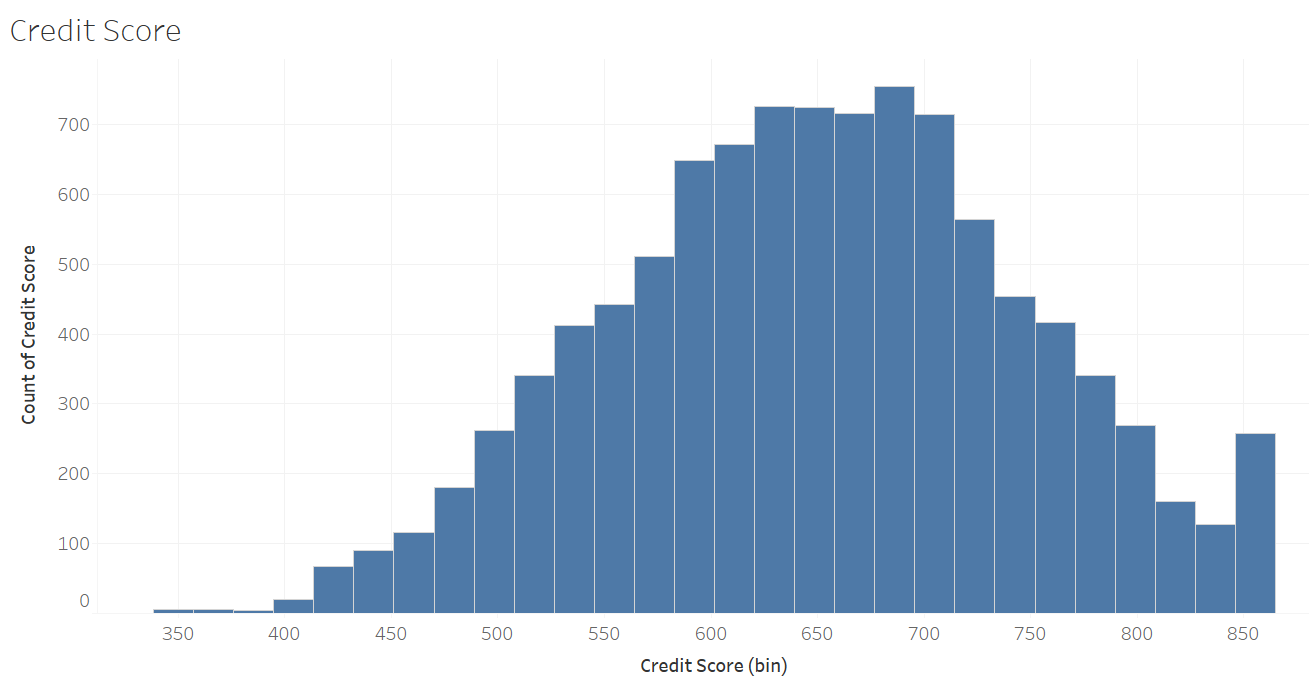
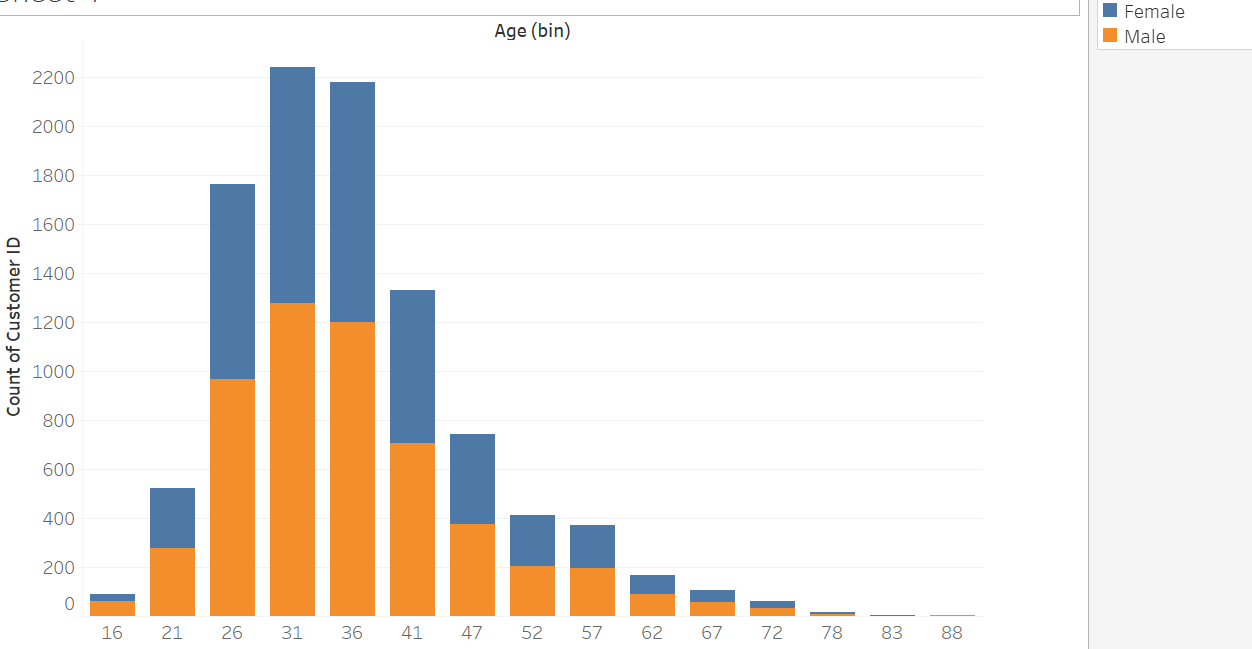
This Data Makes no sense - Age vs salary distribution
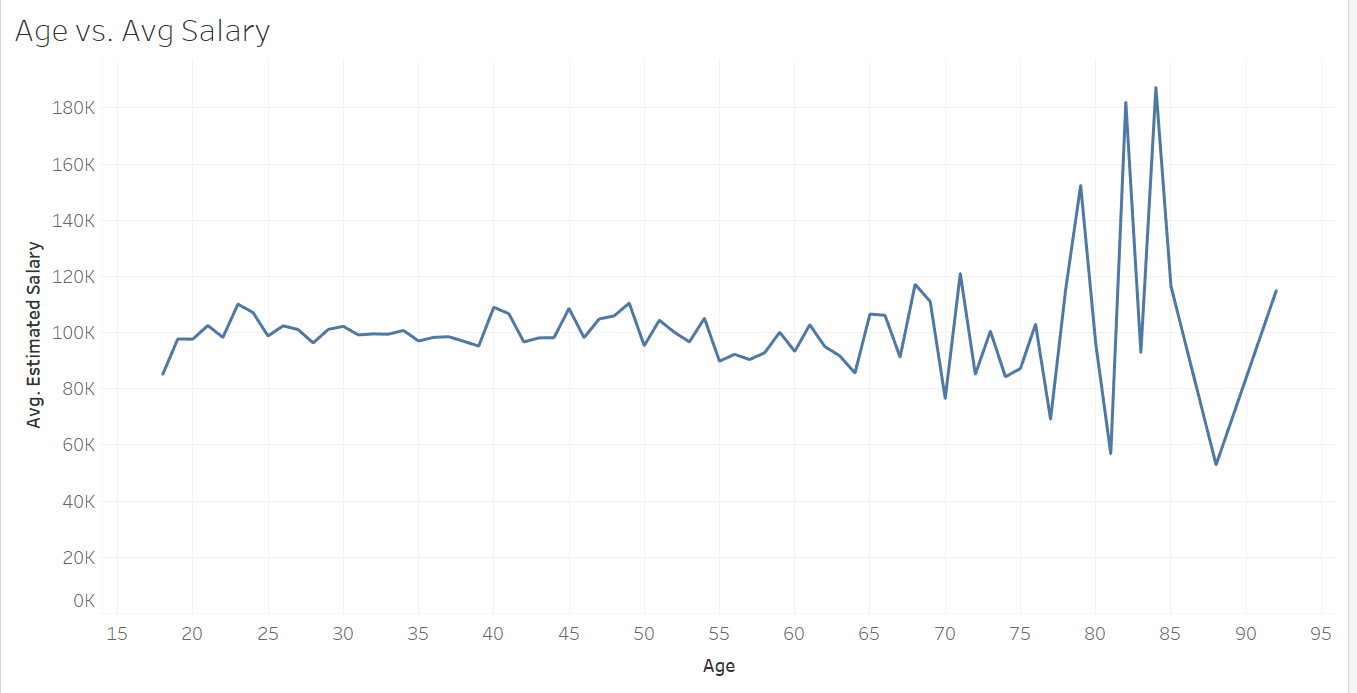


____
## Clustering

In [7]:
#!pip install kneed

from sklearn.cluster import KMeans 
from sklearn.cluster import Birch
from kneed import KneeLocator
from dmba import classificationSummary

In [8]:
kdf=df.copy()

kdf.set_index('CustomerID',inplace=True)

In [9]:
kdf

,Gender,Married,NumBankAccts,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,LastTransactionAmt
CustomerID,,,,,,,,,,,,,,,,,,
15634602.0,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0,1.0,0.16,0.0,75615.0,0.1232,0.3623,2095.3
15647311.0,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.48,33658.0,21131.0,0.1262,0.4050,9955.2
15619304.0,0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,1.0,0.13,0.0,86608.0,0.0997,0.4239,9123.1
15701354.0,0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.21,1431.0,54767.0,0.0932,0.1576,5973.3
15737888.0,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.03,40265.0,28374.0,0.1289,0.1568,9834.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229.0,1,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0,0.46,21524.0,30463.0,0.1325,0.3021,2163.0
15569892.0,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0.0,0.32,10928.0,34666.0,0.1011,0.3124,654.7
15584532.0,0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1,1.0,0.17,28230.0,24932.0,0.1060,0.2283,8673.2


### Correlation Analysis

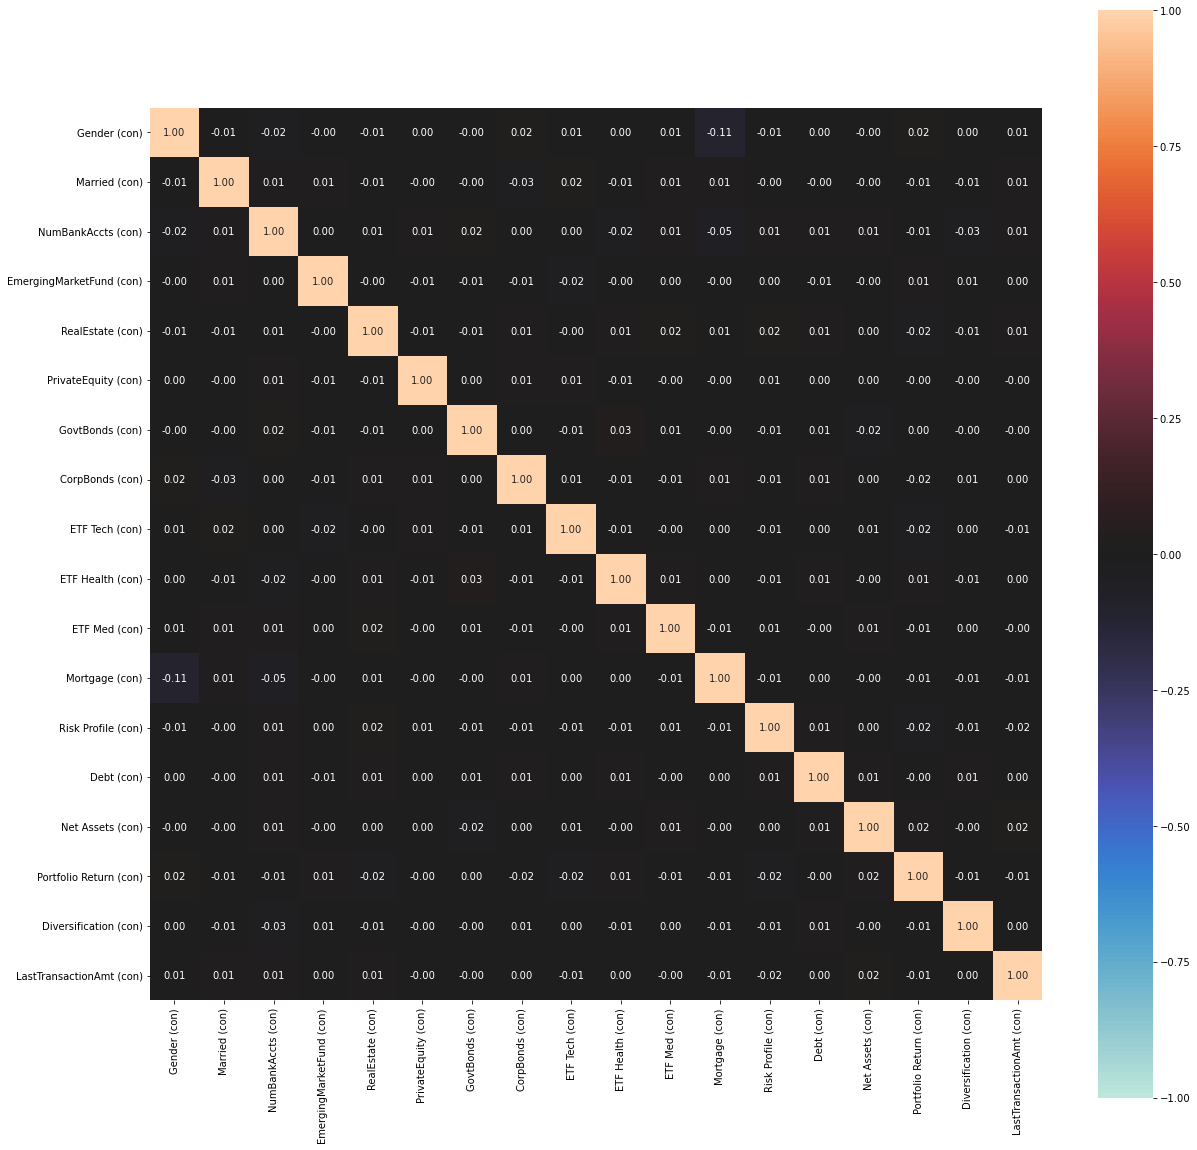

{'corr':                           Gender (con)  Married (con)  NumBankAccts (con)  \
 Gender (con)                  1.000000      -0.009759           -0.021859   
 Married (con)                -0.009759       1.000000            0.010139   
 NumBankAccts (con)           -0.021859       0.010139            1.000000   
 EmergingMarketFund (con)     -0.002353       0.014938            0.002495   
 RealEstate (con)             -0.005205      -0.005931            0.006086   
 PrivateEquity (con)           0.003086      -0.001176            0.014484   
 GovtBonds (con)              -0.000972      -0.004409            0.016070   
 CorpBonds (con)               0.018381      -0.027485            0.003504   
 ETF Tech (con)                0.006293       0.019328            0.000789   
 ETF Health (con)              0.003891      -0.014869           -0.022711   
 ETF Med (con)                 0.006068       0.011050            0.009612   
 Mortgage (con)               -0.106512       0.009874  

In [10]:
nominal.associations(kdf,figsize=(20,20),mark_columns=True)

____

### Data preperation for modelling

In [11]:
import warnings

warnings.filterwarnings('ignore')

In [12]:
# Replacing Outliers
replaced_df = kdf.copy()

for i in range(replaced_df.shape[1]):
    p_95 = replaced_df[replaced_df.columns[i]].quantile(0.95)
    replaced_df[replaced_df.columns[i]][replaced_df[replaced_df.columns[i]]>p_95] = p_95

In [13]:
from sklearn import preprocessing

## Min-max scaling - scaling whole dataset - because its clustering
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(replaced_df)

#Converting the numpy array into a pandas DataFrame
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.333333,0.000000,0.733046,0.454713,0.725187,0.187981
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.793484,0.014391,0.486290,0.843240,1.000000
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.270833,0.000000,0.878047,0.207358,0.895494,0.956012
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.437500,0.033736,0.458057,0.138940,0.159248,0.611787
4,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.062500,0.949243,0.109927,0.514710,0.157036,1.000000


In [14]:
#Dropping NULL values in the scaled data
scaled_df.dropna(inplace=True)

# Transform dataframe as array
x_array = scaled_df.values

In [15]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans 
ks = range(1,10)
inertias = []
centroids = []
scaler = StandardScaler()

scaled_df.dropna(inplace=True)

_____

## Clustering -- Customer Segmentation

In [16]:
from sklearn.pipeline import make_pipeline

# Making pipeline
for k in ks:
    model = KMeans(n_clusters = k)
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(scaled_df)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
    centroids.append(pipeline.named_steps['kmeans'].cluster_centers_)

4


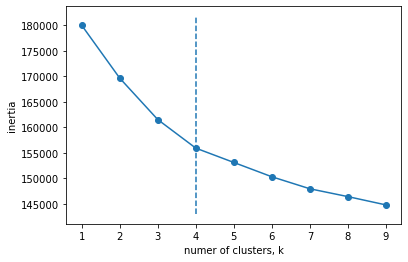

In [17]:
# Get a good line on best k (elbow) using kneed
kknee = KneeLocator(ks, inertias, curve = 'convex', direction = 'decreasing')
print(kknee.knee)
plt.plot(ks, inertias, '-o')
plt.xlabel('numer of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.vlines(kknee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

**Continuing with 4 clusters**

In [18]:
x_array

array([[0.        , 1.        , 0.        , ..., 0.45471291, 0.72518662,
        0.18798075],
       [0.        , 1.        , 0.        , ..., 0.4862902 , 0.84324025,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.20735751, 0.8954935 ,
        0.95601233],
       ...,
       [0.        , 0.        , 0.        , ..., 0.27366981, 0.35471385,
        0.90684511],
       [1.        , 1.        , 1.        , ..., 0.83364033, 0.59690351,
        0.96414312],
       [0.        , 0.        , 0.        , ..., 0.92942477, 0.13021841,
        0.17520536]])

In [19]:
# Model with best k
# Here k = 4
k4_model = KMeans(n_clusters=4, random_state=1)
model_pipe = make_pipeline(scaler, k4_model)
model_pipe.fit(x_array)
# You predict on the same x
labels = model_pipe.predict(x_array)

kmeans_result_df = scaled_df.copy()
kmeans_result_df['labels'] = labels

In [20]:
kmeans_result_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,labels
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.333333,0.000000,0.733046,0.454713,0.725187,0.187981,0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.793484,0.014391,0.486290,0.843240,1.000000,1
2,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.270833,0.000000,0.878047,0.207358,0.895494,0.956012,0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.437500,0.033736,0.458057,0.138940,0.159248,0.611787,3
4,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.062500,0.949243,0.109927,0.514710,0.157036,1.000000,1


In [21]:
# Composition of each cluster
pd.DataFrame(labels).value_counts()

3    2830
1    2757
2    2376
0    2037
dtype: int64

In [22]:
# Placing labels in the original dataset
ds = kdf.copy()
ds['labels'] = labels
ds['labels'] = ds['labels'].astype('category')

#Saving the results into a CSV file
ds.to_csv('CustomerData_with_Cluster_Labels.csv',index=False,header=True)

____

## Exploring traits for these Customer Segments

In [23]:
clu_mean = ds.groupby('labels').mean()
pd.set_option('display.max_columns',None)
clu_mean

,Gender,Married,NumBankAccts,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,LastTransactionAmt
labels,,,,,,,,,,,,,,,,,,
0,0.440844,0.712813,1.475209,0.495827,0.508591,0.495827,0.501227,0.520373,0.508591,0.499264,0.508591,1.0,0.250560,18283.403535,59682.493373,0.129360,0.289739,5159.563918
1,0.569822,1.000000,1.527385,0.505259,0.503083,0.495829,0.519042,0.484222,0.513239,1.000000,0.527385,0.0,0.250395,18476.404788,59795.117882,0.130069,0.290891,5231.378818
2,0.574495,0.000000,1.546296,0.484007,0.497896,0.500842,0.510101,0.531987,0.487795,0.509680,0.512626,0.0,0.251982,18107.816919,59767.635101,0.130267,0.293655,5183.916625
3,0.573498,1.000000,1.559011,0.502473,0.496113,0.504947,0.486926,0.495053,0.516961,0.000000,0.509894,0.0,0.256007,17786.649117,60118.216608,0.129744,0.292103,5218.537668


#### Whether married or not?

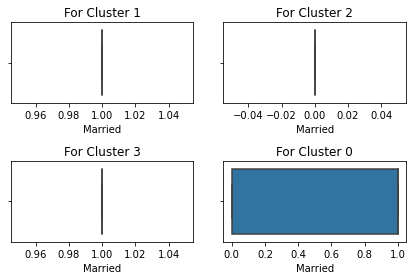

In [35]:
plt.subplot(2,2,1)
plt.title('For Cluster 1')
sns.boxplot(ds[ds['labels']==1]['Married'])

plt.subplot(2,2,2)
plt.title('For Cluster 2')
sns.boxplot(ds[ds['labels']==2]['Married'])

plt.subplot(2,2,3)
plt.title('For Cluster 3')
sns.boxplot(ds[ds['labels']==3]['Married'])

plt.subplot(2,2,4)
plt.title('For Cluster 0')
sns.boxplot(ds[ds['labels']==0]['Married'])

plt.tight_layout()

Cluster 1 & 3 --> Contain MARRIED people only

Cluster 2 --> COntains ONLY UN-MARRIED PEOPLE


In [25]:
ds[ds['labels']==0].describe()

,Gender,Married,NumBankAccts,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,LastTransactionAmt
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,0.440844,0.712813,1.475209,0.495827,0.508591,0.495827,0.501227,0.520373,0.508591,0.499264,0.508591,1.0,0.250560,18283.403535,59682.493373,0.129360,0.289739,5159.563918
std,0.496610,0.452561,0.801521,0.500105,0.500049,0.500105,0.500121,0.499707,0.500049,0.500122,0.500049,0.0,0.149978,14771.157528,23117.954877,0.028787,0.109678,2786.086286
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,20060.000000,0.080000,0.100200,380.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.120000,2942.000000,39338.000000,0.104000,0.195100,2736.600000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,0.250000,17669.000000,59485.000000,0.130200,0.289900,5107.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.390000,31094.000000,79907.000000,0.154200,0.385100,7613.900000
max,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.500000,44975.000000,99981.000000,0.180000,0.479800,9998.800000


In [26]:
ds[ds['labels']==1].describe()

,Gender,Married,NumBankAccts,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,LastTransactionAmt
count,2757.000000,2757.0,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.0,2757.000000,2757.0,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000,2757.000000
mean,0.569822,1.0,1.527385,0.505259,0.503083,0.495829,0.519042,0.484222,0.513239,1.0,0.527385,0.0,0.250395,18476.404788,59795.117882,0.130069,0.290891,5231.378818
std,0.495191,0.0,0.510834,0.500063,0.500081,0.500073,0.499728,0.499842,0.499915,0.0,0.499340,0.0,0.148722,14762.947971,23116.982755,0.029242,0.110391,2788.342991
min,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,20149.000000,0.080000,0.100000,375.200000
25%,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.120000,3600.000000,39194.000000,0.103500,0.196100,2829.900000
50%,1.000000,1.0,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.0,0.250000,17678.000000,60095.000000,0.130800,0.290900,5239.900000
75%,1.000000,1.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.0,0.380000,31308.000000,79881.000000,0.155500,0.391100,7711.500000
max,1.000000,1.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.0,0.500000,44998.000000,99973.000000,0.180000,0.479900,9997.500000


In [27]:
clu_median = ds.groupby('labels').median()
pd.set_option('display.max_columns',None)
clu_median

,Gender,Married,NumBankAccts,EmergingMarketFund,RealEstate,PrivateEquity,GovtBonds,CorpBonds,ETF Tech,ETF Health,ETF Med,Mortgage,Risk Profile,Debt,Net Assets,Portfolio Return,Diversification,LastTransactionAmt
labels,,,,,,,,,,,,,,,,,,
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.25,17669.0,59485.0,0.13020,0.2899,5107.00
1,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.25,17678.0,60095.0,0.13080,0.2909,5239.90
2,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.25,17029.0,59702.0,0.12965,0.2956,5186.15
3,1.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.26,16510.0,60199.5,0.12980,0.2917,5220.50


### Visualizing trait importance for individual segments 

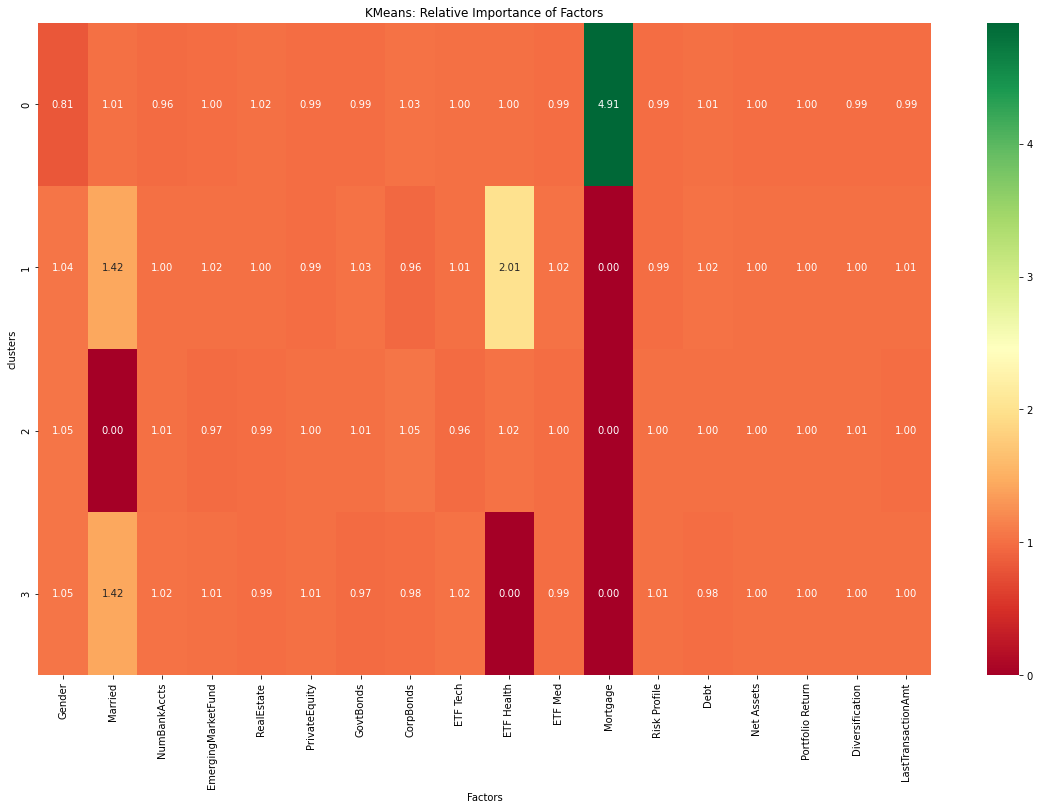

In [28]:
# Importance of Factors
cluster_avg = ds.groupby(['labels']).mean()
population_avg = ds.mean()

relative_imp = cluster_avg/population_avg
relative_imp.sort_values(by=['labels'],inplace=True)
relative_imp.round(2).unstack()

plt.figure(figsize=(20, 12))
plt.title('KMeans: Relative Importance of Factors')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')

plt.xlabel('Factors')
plt.ylabel('clusters')


plt.savefig('kmeans_heat.png')
plt.show()

### Some insights about these 4 clusters:

1. Cluster 0 -> Have high mortgage
2. Cluster 1 -> Are married, don't have any mortgage and prefers to invest in ETF_Health
3. Cluster 2 -> Are unmarried and don't have any mortgage
4. Cluster 3 -> Are married, don't have any mortgage and don't prefer to invest in ETF_Health


## Thank You!

By Team-1

__________